<a href="https://colab.research.google.com/github/aureliodeboa/Restic-K-means/blob/main/Atividade2Restic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import zipfile
from urllib.request import urlretrieve

# Download e extração do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
urlretrieve(url, "har_dataset.zip")

# Extração do arquivo
with zipfile.ZipFile("har_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("HAR_Dataset")

# Leitura dos dados de treino e teste
X_train = pd.read_csv('HAR_Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('HAR_Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Concatenando os dados
X = pd.concat([X_train, X_test], ignore_index=True)


<ipython-input-1-377d17783347>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('HAR_Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-1-377d17783347>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('HAR_Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


In [2]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
# Carregar os nomes das features
features = pd.read_csv('HAR_Dataset/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, usecols=[1])

# Atribuir nomes às colunas
X.columns = features[1].values

X.head()


<ipython-input-5-fd865fb9aa7c>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('HAR_Dataset/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, usecols=[1])


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


##Analise Exploratoria

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   


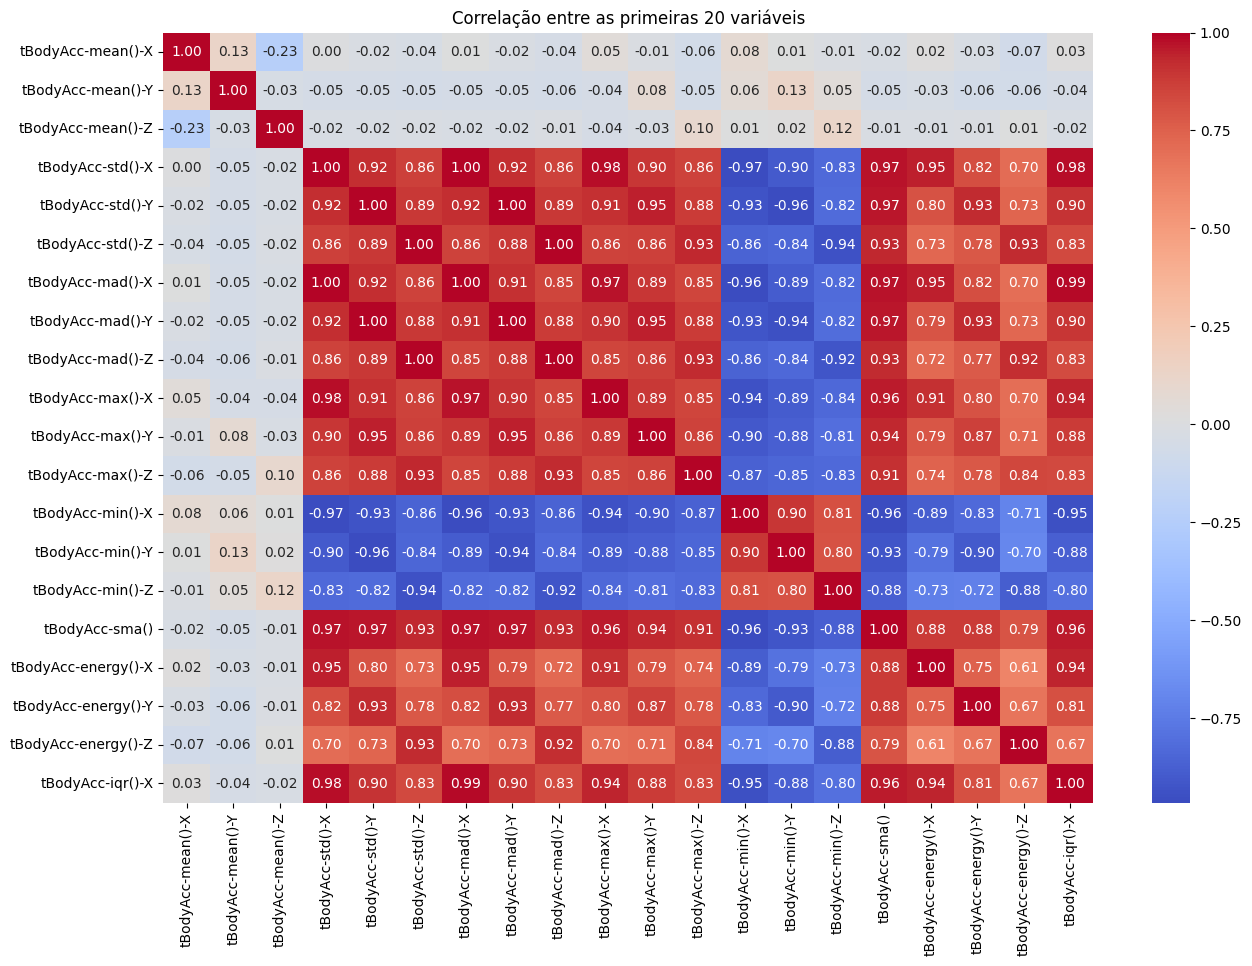

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estatísticas descritivas
print(X.describe())

# Correlação entre as primeiras 20 variáveis para análise
plt.figure(figsize=(15, 10))
sns.heatmap(X.iloc[:, :20].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlação entre as primeiras 20 variáveis')
plt.show()


##Dendorgrama



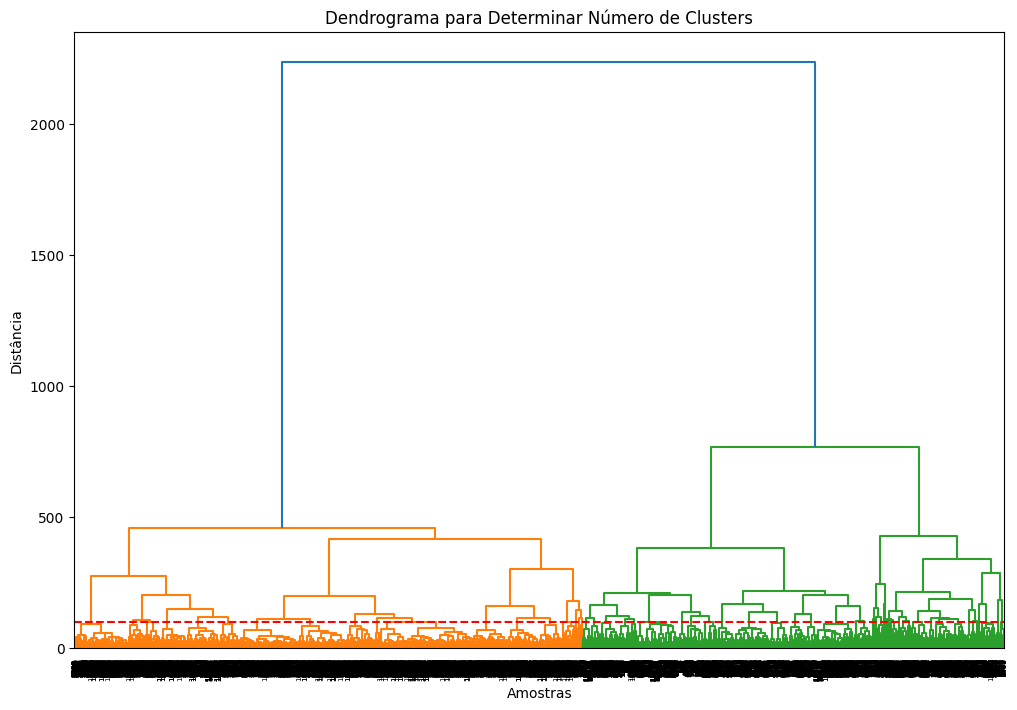

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduzir a dimensionalidade (opcional, para visualização)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Criar a matriz de ligação e o dendrograma
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.axhline(y=100, color='r', linestyle='--')  # Ajuste o valor de 'y' conforme observado
plt.title('Dendrograma para Determinar Número de Clusters')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()


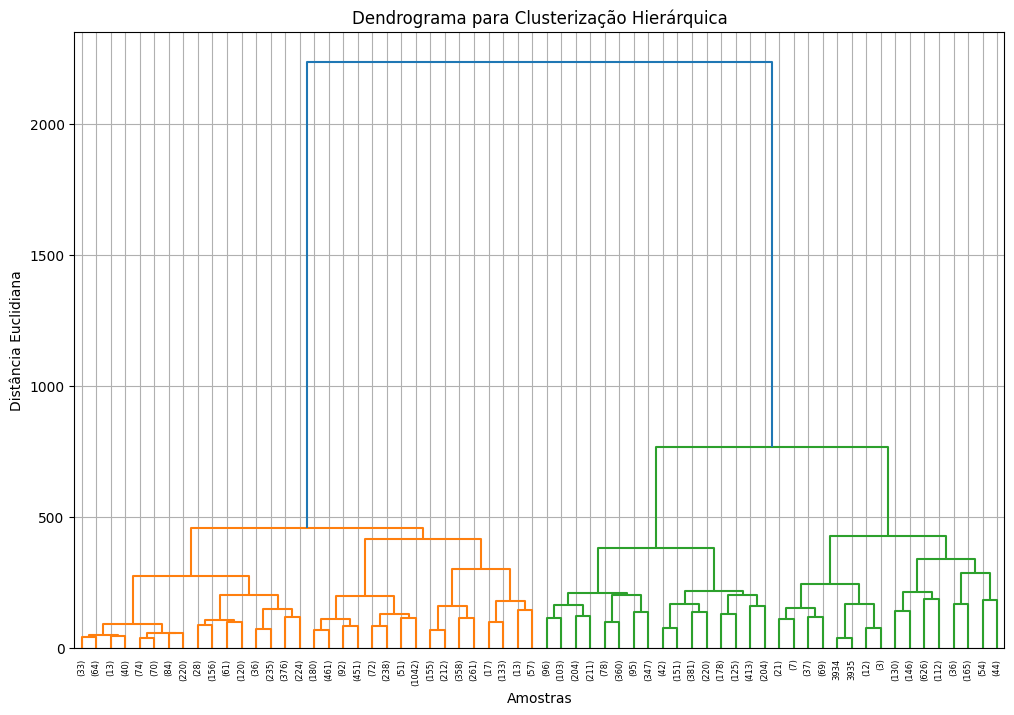

In [16]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculando a matriz de ligação usando o método Ward
linkage_matrix = linkage(X_scaled, method='ward')

# Plotando o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # truncate_mode limita o nível de corte
plt.title('Dendrograma para Clusterização Hierárquica')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.grid(True)
plt.show()


#TSNE

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


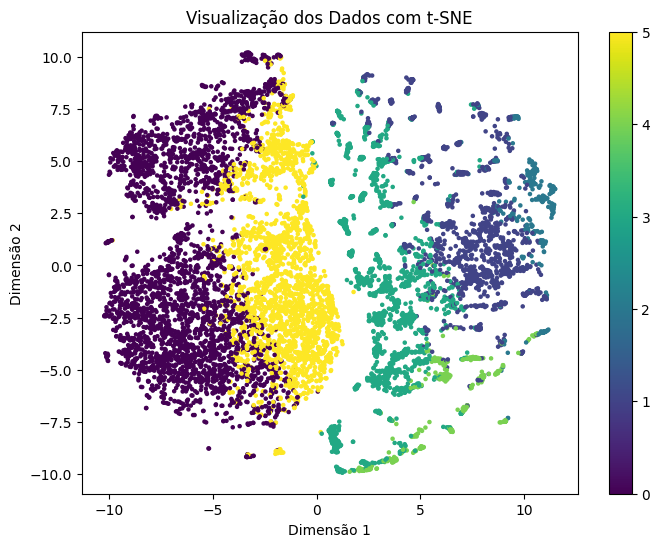

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Reduzindo os dados para 2 dimensões com t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotando os dados reduzidos em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Visualização dos Dados com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar()
plt.show()


##Implementação do Algoritmo de K-means


In [6]:
from sklearn.preprocessing import StandardScaler

# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##Redução de Dimensionalidade com PCA

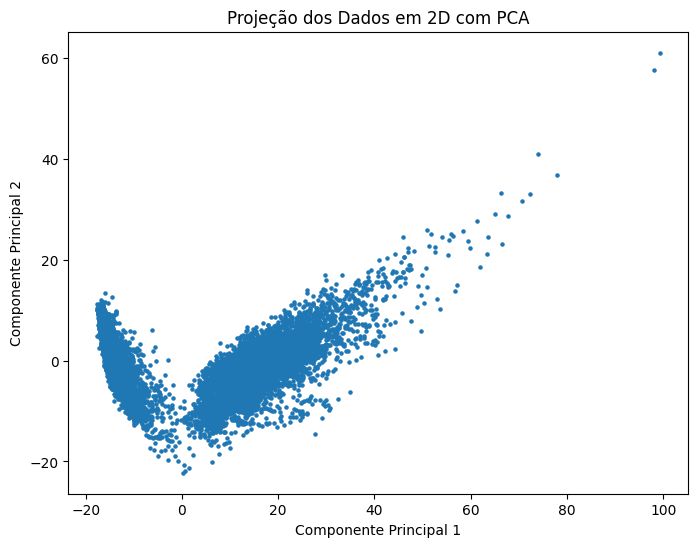

In [7]:
from sklearn.decomposition import PCA

# Reduzir para 2 componentes principais para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualização inicial dos dados em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.title('Projeção dos Dados em 2D com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

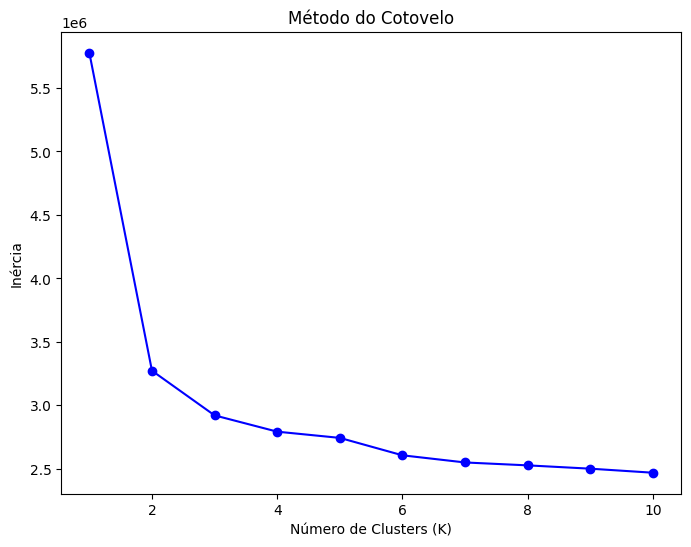

In [20]:
from sklearn.cluster import KMeans

# Testar diferentes valores de K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


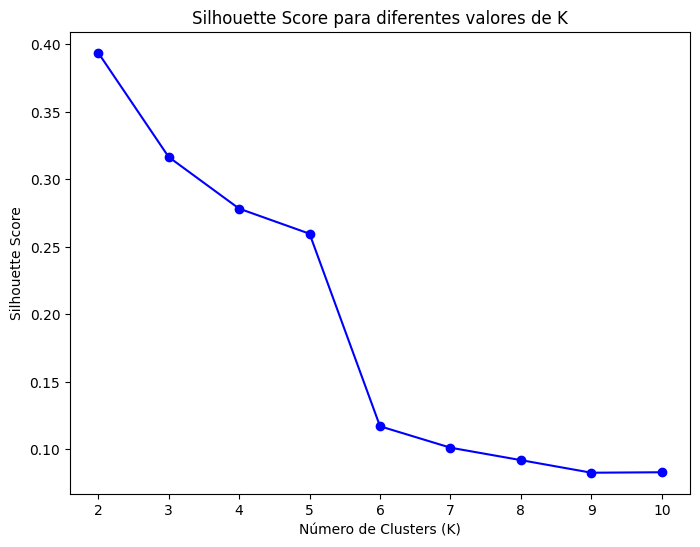

In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K_range[1:]:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando o Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K_range[1:], silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de K')
plt.show()


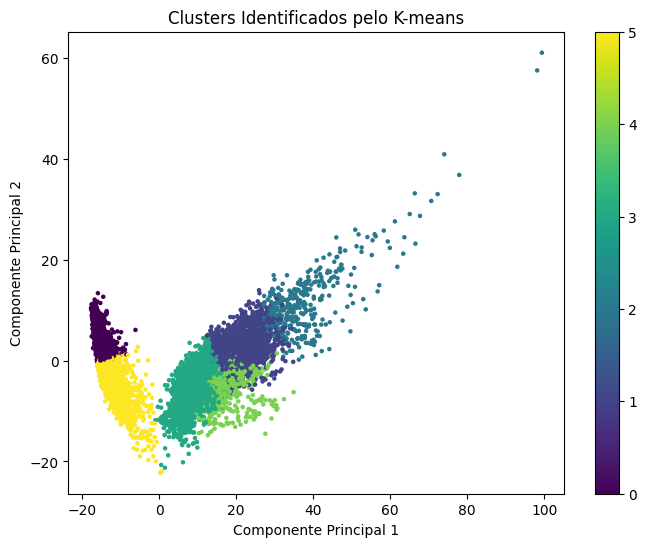

In [10]:
# Selecionando o melhor K (exemplo: 6 baseado no gráfico anterior)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualizando os clusters em 2D após PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Clusters Identificados pelo K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()


In [14]:
# Avaliação final dos clusters
final_silhouette_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score Final: {final_silhouette_score:.2f}")



Silhouette Score Final: 0.12


In [13]:
# Média das features por cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features[1])
print(cluster_centers)

1  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.276486          -0.016850          -0.108372         -0.989965   
1           0.283747          -0.017660          -0.109101         -0.023916   
2           0.276722          -0.020207          -0.113766          0.099619   
3           0.266132          -0.021934          -0.111585         -0.309411   
4           0.265642          -0.023884          -0.116377         -0.218788   
5           0.273179          -0.013477          -0.104783         -0.958051   

1  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.980107         -0.981061         -0.990927         -0.980253   
1          0.074195         -0.231863         -0.079422          0.025416   
2          0.311774          0.102188          0.027922          0.241774   
3         -0.118194         -0.316533         -0.358250         -0.136932   
4          0.080549          0.077471         -0.27769